In [1]:
import logging
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people

print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,format='%(asctime)s %(message)s')

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [4]:
n_samples,h,w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [5]:
print('Total dataset size:')
print(f'number of samples = {n_samples}')
print(f'number of features = {n_features}')
print(f'number of classes = {n_classes}')

Total dataset size:
number of samples = 1288
number of features = 1850
number of classes = 7


In [6]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

[1, 1, 1, 1, 1, 1, 1]


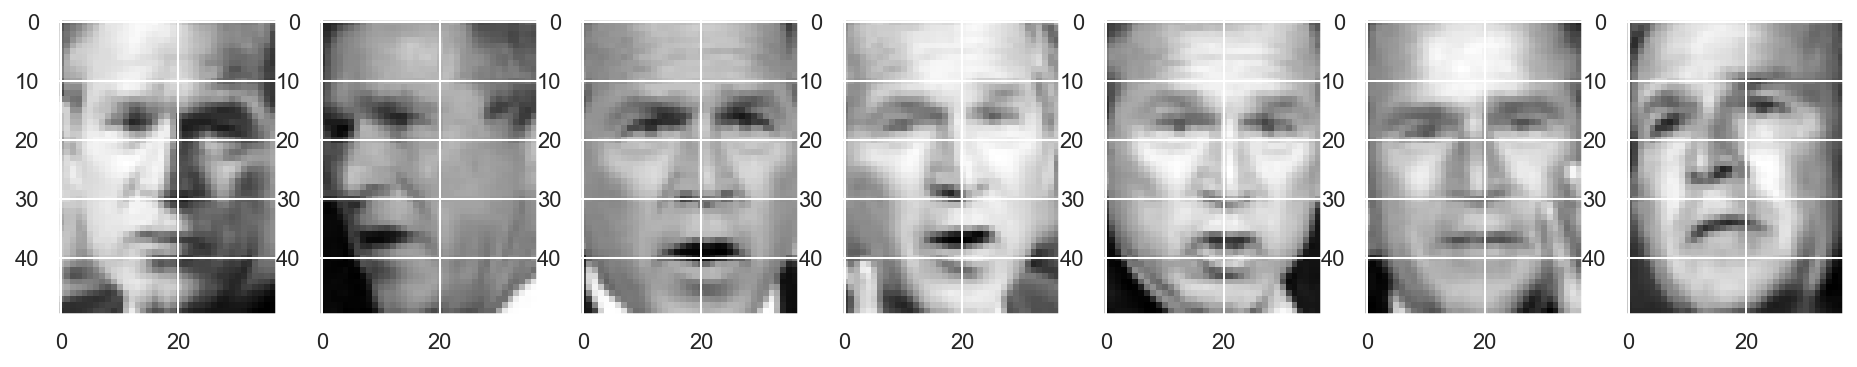

In [7]:
X_data = []
y_data = []
M = 7

my_cmap = sns.cubehelix_palette(light=1, as_cmap=True)

for i in range(len(X)):
    if y[i] == 3 or y[i] == 2:
        X_data = X_data + [X[i]]
        y_data = y_data + [y[i]]
y_data = list(map(lambda x: 1 if x==3 else -1, y_data))
print(y_data[M:2*M])
plt.figure(figsize=(16,20))
for i in range(M):
    plt.subplot(1,M,i+1)
    plt.imshow(X_data[i+7].reshape(h,w), cmap = 'gray')

In [8]:
# Split into training/testing sets
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=42)

In [9]:
# Bag of Patches
p = 3
bags = []
if (int(h/p) ==0 or int(w/p)==0):
    print('p is too big, you dingus.')
else:
    for pic in enumerate(X_train):
        pic_arr = pic[1].reshape(h,w)
        bags += [[]]
        for i in range(int(h/p-p)):
            for j in range(int(w/p-p)):
#                 print(i,j)
                bags[pic[0]] += [np.array(pic_arr[i:i+p,j:j+p])]

In [10]:
def kernel_bag(bag1,bag2,sig):
    total = 0
    for patch1 in bag1:
        for patch2 in bag2:
            total += gauss_h(patch1/np.linalg.norm(patch1),patch2/np.linalg.norm(patch2),sig)
    return total/len(bag1)**2

In [11]:
def gauss_h(u,v,sigma):
    if (sigma == 0):
        print('What...? WHAT?! No, no, no! NO! SIGMA IS ZERO! WHAT HAVE YOU DONE?! YOU HAVE DOOMED US A-')
        print('*Well, it seems you have doomed that world to live out eternity slowly travelling towards a singularity...*')
        print("*Why don't you try again, but this time without destroying an entire civiliation, kay?*")
    else:
        return math.e**(-np.linalg.norm(u-v)**2/sigma**2)

In [62]:
def K_means(k_data, k_clusters = 2, ker = None):

    if (ker is None):
        raise Exception('Please specify what kernel you are using for k-means.')
    # Assign random labels
    if (k_clusters > len(k_data)):
        raise Exception(f'You expect more clusters than data?...' +
                        'Seems improbable. #DataElts = {len(k_data)} < #clusters = {k_clusters}')

    #We make sure that every cluster has at least one element
    current_labels = np.concatenate((np.linspace(0,k_clusters-1,k_clusters,dtype=int),
                                       np.random.randint(2, size=len(k_data)-k_clusters)))
    prev_labels = np.zeros(len(k_data),dtype=int)

    # Is this guaranteed to terminate?
    # Terminates when labels remain unchanged
    while(np.all(prev_labels != current_labels)):
        prev_labels = current_labels[:]
        cluster_vecs = [[] for i in range(k_clusters)]

        # Group clusters for mean computations
        for i,v in enumerate(k_data):
             cluster_vecs[current_labels[i]].append(v)

        # Relabel according to distance to means
        for i,v in enumerate(k_data):
            min_dist = sum(list(map(lambda x: ker(x-v,x-v),cluster_vecs[current_labels[i]])))
            /len(cluster_vecs[current_labels[i]])
            #Inefficiency because we compute the distance to its current mean twice...
            for j, c in enumerate(cluster_vecs):
                cur_dist = sum(list(map(lambda x: ker(x-v,x-v),c)))/len(c)
                if(cur_dist < min_dist):
                    current_labels[i] = j

    cluster_vecs = [[] for i in range(k_clusters)]
    # Group clusters for mean computations
    for i,v in enumerate(k_data):
         cluster_vecs[current_labels[i]].append(v)

    # Compute the errors
    errors = np.zeros(k_clusters)
    # (Still need to implement...)
#     for i, c in enumerate(cluster_vecs):
#         print(i)
#         errors[i] = sum(list(map(lambda v: sum(list(map(lambda x: ker(np.array(x)-np.array(v),np.array(x)-np.array(v)),c))), c)))
    return (current_labels,errors)

In [61]:
scl = 10
# rand_sigs = [scl*np.random.rand() for i in range(10)]
rand_sigs = [1]
sig_err = []

for sigma in rand_sigs:
    def k_bag_sig(u,v):
        return kernel_bag(u,v,sigma)
    labels,err = K_means(bags, ker=k_bag_sig)
    labels = np.array(list(map(lambda x: 1 if x==1 else -1, labels)))
    if(len(list(filter(lambda x: x == 0, labels+y_train))) < len(list(filter(lambda x: x == 0, labels-y_train)))):
        labels = -labels
    sig_err.append((sigma,err))
print(sig_err)
#     print(len(list(filter(lambda x: x == 0, labels-y_train))))

[(1, array([0., 0.]))]


In [14]:
[[] for i in range(3)]

[[], [], []]

In [15]:
means = np.repeat(np.zeros())

TypeError: Required argument 'shape' (pos 1) not found

In [16]:
np.linspace(0,2,2)

array([0., 2.])

In [17]:
s = 'a b c'.split()
# for i,l in enumerate(s):
#     print(i, l)
s.append('d');s

['a', 'b', 'c', 'd']

In [18]:
y = 3
np.linspace(0,y-1,y,dtype=int)

array([0, 1, 2])

In [19]:
y = np.zeros(3)
z = np.random.randint(3,size=2)
print(np.concatenate((y,z)))

[0. 0. 0. 0. 1.]


In [20]:
a = [1, 2, 3,
    4, 5];a

[1, 2, 3, 4, 5]

In [21]:
print('hello\\
       i want to break this apart')

SyntaxError: EOL while scanning string literal (<ipython-input-21-a83d625a9d2d>, line 1)